# 1. Carga de los datos

In [7]:
#Ejecutar en terminal: pip install -r requirements.txt

import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Set the path to the file you'd like to load
file_path = "./Student_Performance.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "nikhil7280/student-performance-multiple-linear-regression",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

First 5 records:    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


## Cargar el dataset en Dataframe

In [8]:
# Cargar el dataset en un DataFrame
import pandas as pd

df = pd.read_csv("Student_Performance.csv")

# Explorar la estructura del dataset
print("Forma del DataFrame (filas, columnas):", df.shape)
print("\nTipos de datos de cada columna:")
print(df.dtypes)
print("\nPrimeras 10 filas del DataFrame:")
print(df.head(10))
print("\n================================= Información del DataFrame (memoria, tipos de datos) ==============================")
df.info()

# Estadísticas descriptivas
print("\n================================= Estadísticas Descriptivas (media, std, min, max) ==============================")
print(df.describe())

Forma del DataFrame (filas, columnas): (10000, 6)

Tipos de datos de cada columna:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Primeras 10 filas del DataFrame:
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   
5              3               78                         No            9   
6              7               73                        Yes      

# Análisis de características

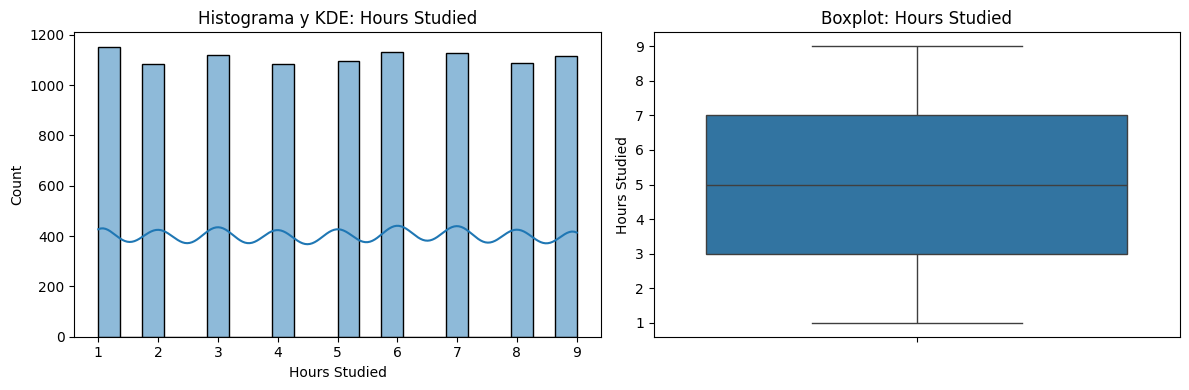

Estadísticos de Hours Studied:
count    10000.000000
mean         4.992900
std          2.589309
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Hours Studied, dtype: float64
Asimetría: -0.004, Curtosis: -1.232



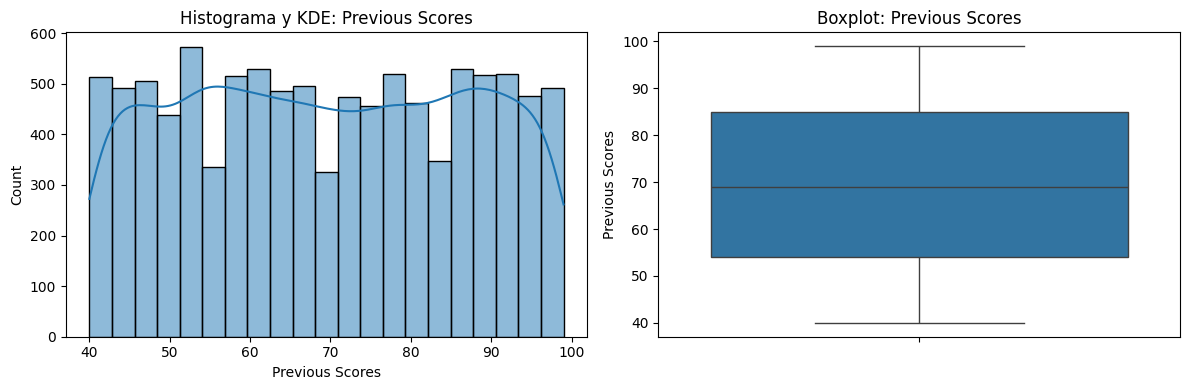

Estadísticos de Previous Scores:
count    10000.000000
mean        69.445700
std         17.343152
min         40.000000
25%         54.000000
50%         69.000000
75%         85.000000
max         99.000000
Name: Previous Scores, dtype: float64
Asimetría: 0.005, Curtosis: -1.213



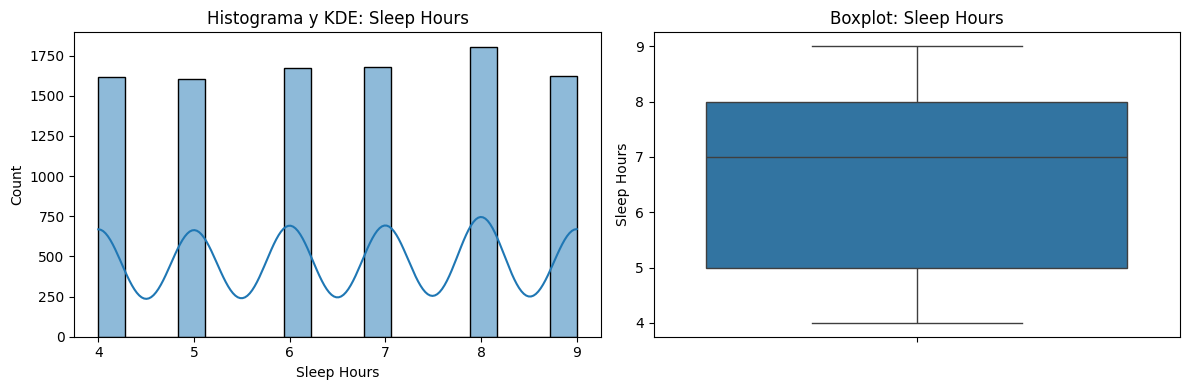

Estadísticos de Sleep Hours:
count    10000.000000
mean         6.530600
std          1.695863
min          4.000000
25%          5.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Sleep Hours, dtype: float64
Asimetría: -0.039, Curtosis: -1.257



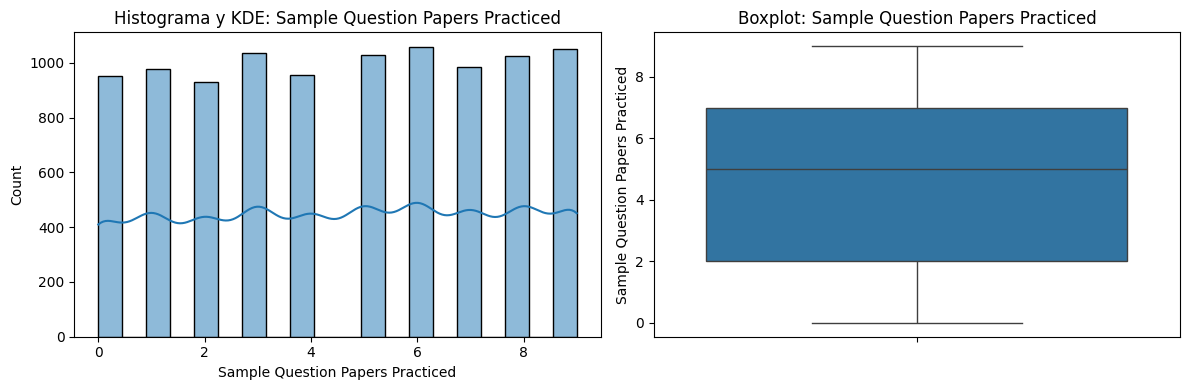

Estadísticos de Sample Question Papers Practiced:
count    10000.000000
mean         4.583300
std          2.867348
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Sample Question Papers Practiced, dtype: float64
Asimetría: -0.036, Curtosis: -1.215



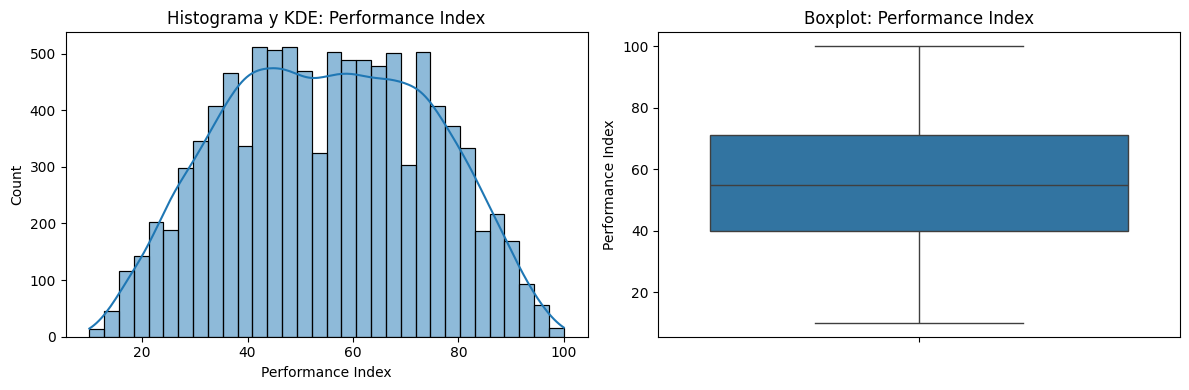

Estadísticos de Performance Index:
count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64
Asimetría: -0.002, Curtosis: -0.861



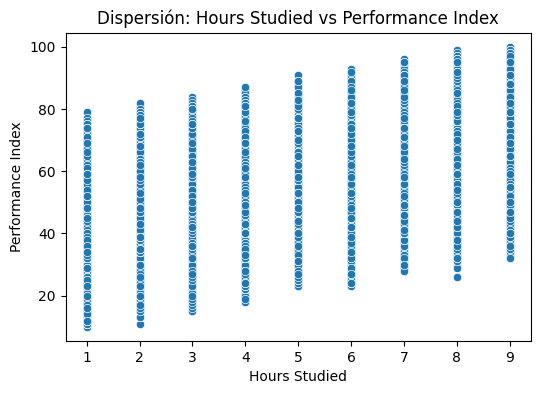

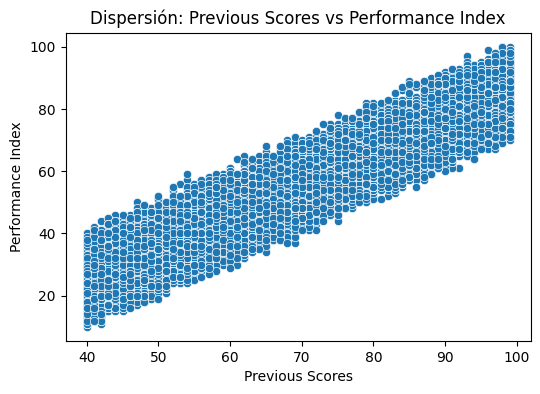

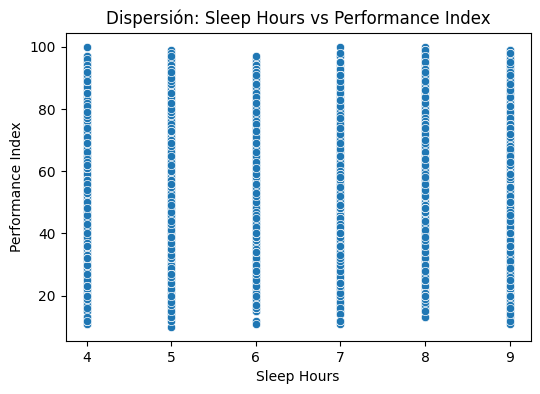

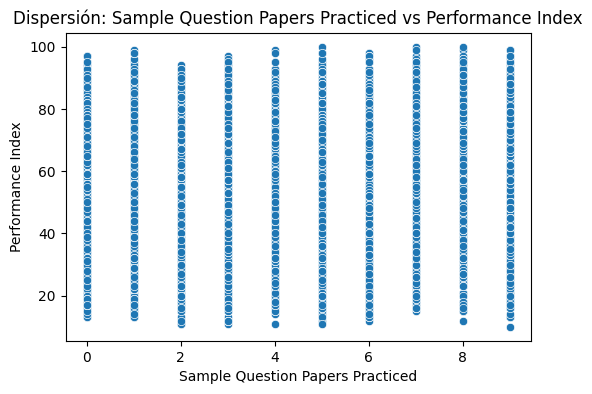

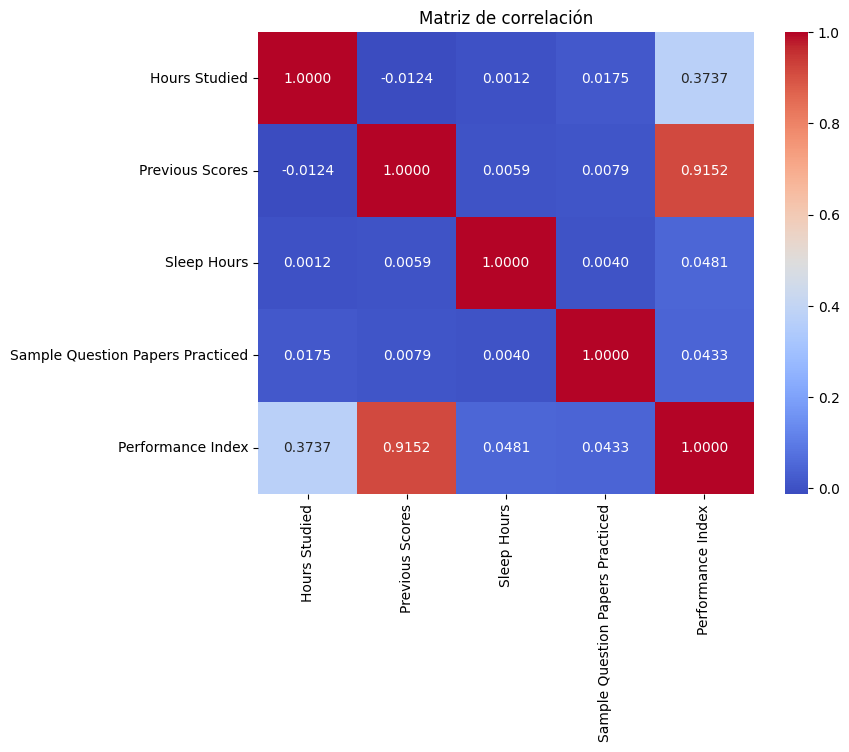

=== Detección de outliers (criterio 1.5*IQR) ===
Hours Studied: 0 outliers
Previous Scores: 0 outliers
Sleep Hours: 0 outliers
Sample Question Papers Practiced: 0 outliers
Performance Index: 0 outliers

=== Interpretación y tratamiento de outliers ===
- Hours Studied: No se detectaron valores atípicos significativos.
- Previous Scores: No se detectaron valores atípicos significativos.
- Sleep Hours: No se detectaron valores atípicos significativos.
- Sample Question Papers Practiced: No se detectaron valores atípicos significativos.
- Performance Index: No se detectaron valores atípicos significativos.


In [9]:
# --- Análisis exploratorio de datos (EDA) ---

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Histogramas y boxplots de variables numéricas
num_cols = df.select_dtypes(include=[np.number]).columns

for col in num_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axs[0])
    axs[0].set_title(f"Histograma y KDE: {col}")
    sns.boxplot(y=df[col], ax=axs[1])
    axs[1].set_title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()
    print(f"Estadísticos de {col}:")
    print(df[col].describe())
    print(f"Asimetría: {df[col].skew():.3f}, Curtosis: {df[col].kurtosis():.3f}\n")

# 2. Diagramas de dispersión entre características numéricas y el target
target = 'Performance Index'
for col in num_cols:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"Dispersión: {col} vs {target}")
        plt.show()

# 3. Matriz de correlación y mapa de calor
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Matriz de correlación")
plt.show()

# 4. Identificación de outliers usando el criterio de 1.5*IQR
print("=== Detección de outliers (criterio 1.5*IQR) ===")
outlier_report = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    n_outliers = outliers.shape[0]
    outlier_report[col] = n_outliers
    print(f"{col}: {n_outliers} outliers")

# 5. Interpretación y tratamiento de outliers
print("\n=== Interpretación y tratamiento de outliers ===")
for col, n_outliers in outlier_report.items():
    if n_outliers > 0:
        print(f"- {col}: Se detectaron {n_outliers} valores atípicos. Se recomienda revisar si son errores de captura o valores extremos válidos. Si afectan el análisis, considerar su tratamiento (eliminación o imputación).")
    else:
        print(f"- {col}: No se detectaron valores atípicos significativos.")


## Normalización de los datos
---

##### ¿Porque normalizar los datos?

El motivo de realizar la normalización de los datos es establecerlos todos en una escala similar, esto debido a que en el dataset como se puede apreciar se toman datos muy diferenciados en sus escalas, por ejemplo "previous scores" las cuales llegan hasta el 99, comparandolo con por ejemplo sleep hours, queda muy separada la escala, lo cual va a generar que al realizar los calculos del descenso del gradiente, le asigne mayor peso al feature con mayor tamaño, haciendolo más relevante en la regresión, cuando puede no serlo. 

In [10]:
# Copiar dataset para no modificar el original
df_norm = df.copy()

# Convertir columna categórica a numérica (Yes=1, No=0)
df_norm["Extracurricular Activities"] = df_norm["Extracurricular Activities"].map({"Yes": 1, "No": 0})

# Se escogen las columnas a normalizar (todas menos PerformanceIndex y la categórica)
cols_to_normalize = ["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]

# Normalizar con Z-score
for col in cols_to_normalize:
    mean = df_norm[col].mean()
    std = df_norm[col].std()
    df_norm[col] = (df_norm[col] - mean) / std

# Mostrar primeras filas normalizadas

print("---Columnas sin normalizar---\n" , df.head(),"\n\n---Columnas normalizadas---\n" , df_norm.head())

---Columnas sin normalizar---
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0   

---Columnas normalizadas---
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775149         1.704090                      

# Division del Dataset

In [11]:
import numpy as np
import pandas as pd

# 1) Muestreo aleatorio (Random Sampling)
np.random.seed(50)  # Para reproducibilidad
indices = np.random.permutation(len(df_norm))
n_total = len(df_norm)
n_train = int(0.7 * n_total)
n_val = int(0.15 * n_total)
n_test = int(0.15 * n_total)

train_idx = indices[:n_train]
val_idx = indices[n_train:n_train + n_val]
test_idx = indices[n_train + n_val:]

df_train_random = df_norm.iloc[train_idx].reset_index(drop=True)
df_val_random = df_norm.iloc[val_idx].reset_index(drop=True)
df_test_random = df_norm.iloc[test_idx].reset_index(drop=True)

print("Random Sampling:")
print(f"Entrenamiento: {df_train_random.shape}, Validación: {df_val_random.shape}, Prueba: {df_test_random.shape}")

# 2) Muestreo estratificado (Stratified Sampling) usando la variable categórica
# Usaremos 'Extracurricular Activities' como variable de estratificación
strat_col = 'Extracurricular Activities'
df_strat = df_norm.copy()
df_train_strat = pd.DataFrame()
df_val_strat = pd.DataFrame()
df_test_strat = pd.DataFrame()

for group, group_df in df_strat.groupby(strat_col):
    idx = np.random.permutation(len(group_df))
    n = len(group_df)
    n_train = int(0.7 * n)
    n_val = int(0.15 * n)
    n_test = int(0.15 * n)

    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train + n_val]
    test_idx = idx[n_train + n_val:]

    df_train_strat = pd.concat([df_train_strat, group_df.iloc[train_idx]], axis=0)
    df_val_strat = pd.concat([df_val_strat, group_df.iloc[val_idx]], axis=0)
    df_test_strat = pd.concat([df_test_strat, group_df.iloc[test_idx]], axis=0)

df_train_strat = df_train_strat.sample(frac=1, random_state=50).reset_index(drop=True)
df_val_strat = df_val_strat.sample(frac=1, random_state=50).reset_index(drop=True)
df_test_strat = df_test_strat.sample(frac=1, random_state=50).reset_index(drop=True)

print("\nStratified Sampling (por Extracurricular Activities):")
print(f"Entrenamiento: {df_train_strat.shape}, Validación: {df_val_strat.shape}, Prueba: {df_test_strat.shape}")

Random Sampling:
Entrenamiento: (7000, 6), Validación: (1500, 6), Prueba: (1500, 6)

Stratified Sampling (por Extracurricular Activities):
Entrenamiento: (6999, 6), Validación: (1499, 6), Prueba: (1502, 6)


Una vez Divididos en las formas de sampling, se procede a iniciar con la regresión lineal del descenso del gradiente, con esto se busca pulir los valores w y b de la función para aproximarlo a uno de los minimos de la función 